<h3><strong>지도학습(회귀) 랜덤포레스트</strong></h3>

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [10]:
dataset=load_breast_cancer()
x=DataFrame(dataset['data'],columns=dataset['feature_names'])
y=DataFrame(dataset['target'],columns=['target'])

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.33,random_state=42)

# 하이퍼 파라미터 튜닝 용
param= {
    'n_estimators':(100, 200),
    'max_depth' : (5, 8),
    'min_samples_leaf' : (8, 18),
    'min_samples_split' : (8, 16)
}

# 하이퍼 파라미터 튜닝
ran_reg=RandomForestRegressor(random_state=1,min_samples_leaf=35,max_depth=10)
grid_cv = GridSearchCV(ran_reg, param_grid=param, cv=2, n_jobs=-1)
grid_cv.fit(x_train, y_train)


print('최적 하이퍼 파라미터:', grid_cv.best_params_)
print('최적 예측 정확도: {}'.format(grid_cv.best_score_))
print('최적의 측정기: {}'.format(grid_cv.best_estimator_))

c:\anaconda3project\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


최적 하이퍼 파라미터: {'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최적 예측 정확도: 0.7818468010962722
최적의 측정기: RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      random_state=1)


In [11]:
# 위의 결과에 따라 최적의 측정기 결과를 반영
rf_run = RandomForestRegressor(random_state=1, max_depth=5, min_samples_leaf=8, min_samples_split=8)
rf_run.fit(x_train, y_train)

c:\anaconda3project\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=8,
                      random_state=1)

In [14]:
#RMSE 값 확인
# train rmse
train_predict = rf_run.predict(x_train)
# print(train_predict)
print("train set RMSE':{}".format(math.sqrt(mean_squared_error(train_predict, y_train))) )
 
# test rmse
rf_run_predict = rf_run.predict(x_test)
# print(rf_run_predict)
print("test set RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, y_test))) )

train set RMSE':0.1605023277339642
test set RMSE':0.1808280028676901


<Axes: >

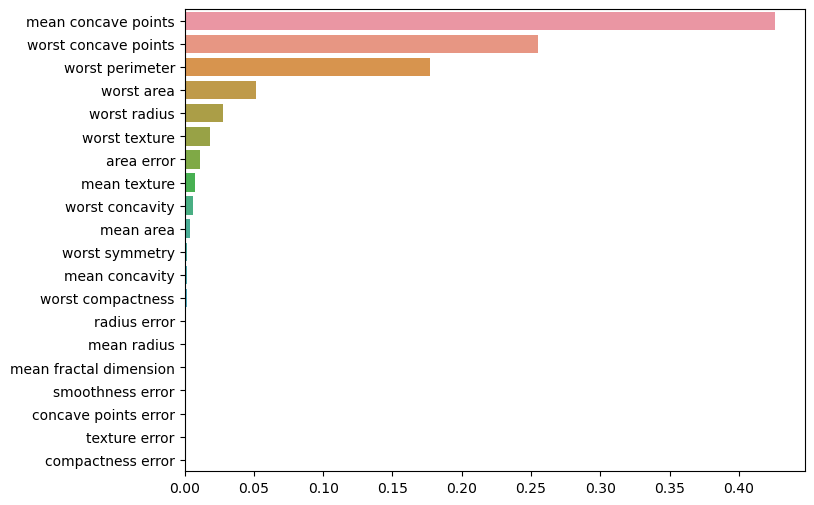

In [6]:
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)

<h3>RandomForestRegressor 파라미터 목록</h3>
criterion: squared_error, absolute_error, poisson. default는 squared_error

n_estimators: 랜덤 포레스트 안의 결정 트리 개수. 클수록 좋으나, 메모리.훈련시간이 증가됨. default는 10

max_features: 무작위로 선택할 Feature의 개수. bootstrap=True이면 n개의 feature에서 복원추출로 n개를 뽑음. False라면 전체 데이터셋을 개별 트리 학습 때마다 사용함.  값이 클수록 트리들이 비슷해져 가장 두드러진 특징에 맞는 예측을, 작을수록 트리들이 서로 달라져 과적합 위험이 낮음. default는 bootstrap=True

oob_score: bootstrap=True 일 때만 유효하고, 일반화 점수 계산 시 oob 샘플 사용 여부를 결정함. default는 False

max_depth : 트리의 깊이를 뜻합니다.

min_samples_leaf : 리프노드가 되기 위한 최소한의 샘플 데이터 수 입니다.

min_samples_split : 노드를 분할하기 위한 최소한의 데이터 수 입니다.

max_leaf_nodes : 리프노드의 최대 개수